### Here, I explore Displacement unitary.

##### I compare the difference between 3 ways of constructing a coherent state:
1. Using D(alpha) @ Fock(0)
2. Using CoheState(alpha) with the analytic normalising coefficient (return ket * expm(-np.abs(alpha)**2 / 2)). Note that since this normalising coefficient is intended for infinite Fock states, our finite-cutoff coherent state doesn't actually normalise to 1 unless the finite-cutoff is large.
3. Using CoheState(alpha) with numerical normalisation (return ket / np.linalg.norm(ket)). This way of constructing the coherent state converges more quickly with D(alpha) @ Fock(0) than option 2.

In [377]:
import numpy as np
from scipy.linalg import expm
import scipy
import matplotlib.pyplot as plt
import time

In [378]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

In [379]:
cavity_dim = 8
omega_q = 21
omega_c = 20
Delta = omega_q - omega_c
chi = 1 / Delta

T = 1
dt = 0.01
t_axis = np.arange(0, T, dt)[0:]

In [380]:
sigmaI = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)
sigmaX = np.array(
    [
        [0, 1],
        [1, 0],
    ]
)
# sigmaZ = np.array(
#     [
#         [-1, 0],
#         [0, 1],
#     ]
# )
sigmaBin = np.array(
    [
        [0, 0],
        [0, 1],
    ]
)

# Annihilation operator
a = np.zeros((cavity_dim, cavity_dim))
n_indices = np.arange(1, cavity_dim)
a[n_indices - 1, n_indices] = np.sqrt(n_indices)
a_dag = a.conjugate().transpose()
# print(a)
# print(a_dag)

def Fock(n):
    vec = [[0] for _ in range(cavity_dim)]
    vec[n] = [1]
    return np.array(vec)
# print(Fock(1))

In [381]:
drive_qubit = np.array([0 for t in t_axis])
drive_cavity = np.array([1/T for t in t_axis])

def H(i):
    # from the SNAP paper, alpha = 1j * integrate(drive_cavity * dt)
    return (
        omega_q * np.kron(sigmaBin, np.identity(cavity_dim))
      + (omega_c - chi*np.kron(sigmaBin, np.identity(cavity_dim))) * (np.kron(sigmaI, a_dag) @ np.kron(sigmaI, a))
      + drive_cavity[i] * np.exp(1j * omega_c * i*dt) * np.kron(sigmaI, a_dag) + drive_cavity[i].conjugate() * np.exp(-1j * omega_c * i*dt) * np.kron(sigmaI, a)
    #   + drive_cavity[i] * np.kron(sigmaI, a_dag) + drive_cavity[i].conjugate() * np.kron(sigmaI, a)
      + drive_qubit[i] * np.exp(1j * omega_q * i*dt) * np.kron(np.array([[0,0],[1,0]]), np.identity(cavity_dim)) + drive_qubit[i].conjugate() * np.exp(-1j * omega_q * i*dt) * np.kron(np.array([[0,1],[0,0]]), np.identity(cavity_dim))
    )

# def D(alpha):
#     return expm(alpha * np.kron(sigmaI, a_dag) - np.conjugate(alpha) * np.kron(sigmaI, a))
def D(alpha):
    return expm(alpha * a_dag - np.conjugate(alpha) * a)

def CoheState(alpha):
    ket = np.zeros((cavity_dim, 1), dtype=np.complex128)
    ket[0] = 1. + 0j
    for n in range(1, cavity_dim):
        ket[n] = ket[n-1] * alpha / np.sqrt(n)
    return ket / np.linalg.norm(ket)
    # return ket * expm(-np.abs(alpha)**2 / 2)
    

In [382]:
ket_alpha = D(1j) @ np.array([[1]] + [[0]]*(cavity_dim-1))
print(ket_alpha)
np.linalg.norm(ket_alpha)

[[ 0.607+0.j   ]
 [ 0.   +0.607j]
 [-0.429+0.j   ]
 [ 0.   -0.248j]
 [ 0.124+0.j   ]
 [ 0.   +0.055j]
 [-0.022+0.j   ]
 [ 0.   -0.01j ]]


np.float64(1.0)

In [383]:
np.dot(ket_alpha.conjugate().transpose(), CoheState(1j))

array([[1.+0.j]])

/Users/roger/Desktop/Bedside Pile/School/Physics/CQT/Yvonne Gao/SP3172/env/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


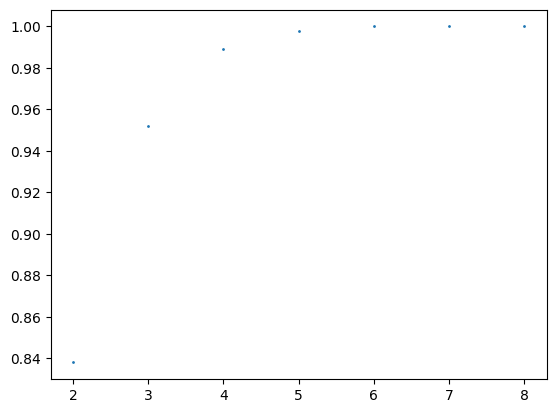

In [384]:
# return ket * expm(-np.abs(alpha)**2 / 2)

inner_product = [0.838+0.j, 0.952+0.j, 0.989+0.j, 0.998+0.j, 1.+0.j, 1.+0.j, 1.+0.j]
cavity_dim_list = list(range(2, 9))
plt.scatter(cavity_dim_list, inner_product, s=1)

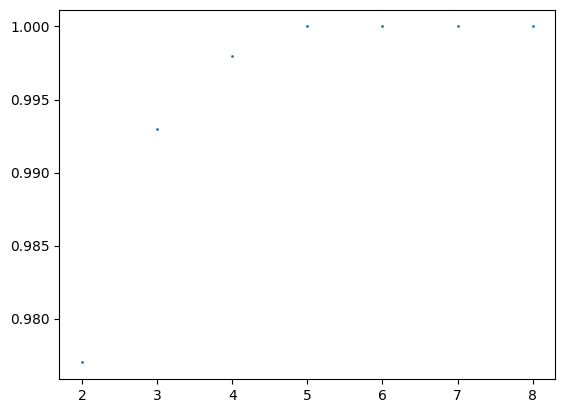

In [385]:
# return ket / np.linalg.norm(ket)

inner_product = [0.977+0.j, 0.993+0.j, 0.998+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]
cavity_dim_list = list(range(2, 9))
plt.scatter(cavity_dim_list, inner_product, s=1)